# We calculate the momentum sum rule of a parton density function by performing explicitly the integral.
We use the LHAPDF library to access the different PDF parameterisations.
We check the momentum sum rule for a standard set, and for the LO* parameterisations.

We use LHAPDF 6.3.0
  
   
###   Authors: H. Jung, A. Bermudez Martinez, L.I. Estevez Banos, J. Lidrych, M. Mendizabal Morentin, S. Taheri Monfared, P. L.S. Connor, Q. Wang, H. Yang, R. Zlebcik 


In [13]:
from ROOT import gRandom
from math import sqrt, log
import lhapdf

ModuleNotFoundError: No module named 'lhapdf'

Import the pdf by name

In [10]:
#name = "MRST2007lomod"	
#name = "PB-TMDNLO-HERAI+II-2018-set1"
name = "PB-TMDNLO-HERAI+II-2018-set2"
#name = "MRST2007lomod"  # LO * pdf 
#name = "MRSTMCal" # LO** pdf 
pdf = lhapdf.getPDFSet(name).mkPDF(0)

NameError: name 'lhapdf' is not defined

In [21]:
gRandom.SetSeed(32767) # initialise random number generator

print the pdf description and infos on pdf

In [22]:
print(pdf.description)

print(" alphas(mz) = ", pdf.alphasQ(91.2))
print(" orderPDF   = ", pdf.orderQCD)
print(" xmin       = ", pdf.xMin)
print(" xmax       = ", pdf.xMax)
print(" q2min      = ", pdf.q2Min) 
print(" q2max      = ", pdf.q2Max)
print("--------------------------------------")


 alphas(mz) =  0.11799755134948405
 orderPDF   =  1
 xmin       =  1e-05
 xmax       =  1.0
 q2min      =  1.89998656
 q2max      =  189998656.0
--------------------------------------


In [23]:
xmin, xmax = pdf.xMin, pdf.xMax # Get the xmin and xmin from info in the PDF set

In [24]:
Q = 10.0 # We will evaluate the sum rule at scale 10 GeV

MC integration with importance sampling 1/x (or linear samopling)

In [25]:
npoints = 100000
sum0 = sum00 = 0
for n in range(npoints):
    # for simple integration
    # x = xmin + (xmax-xmin)*Rand();
    # for importance sampling
    x = xmin * (xmax/xmin)**gRandom.Uniform()
    #  sum over all flavors for mom sum rule
    f=0
    for flavor in range(-6, 6):
        # the pdf from LHAPDFLIB is called via: xfx(x,Q,flavor) 
        # with x=fractional momentum
        # Q = sqrt(q2), the sqrt of the scale
        # flavor = -6,.. ,6 the flavor code of the parton, 
        # flavor: 0=gluon, 1=down, 2=up, 3=strange, 4=charm, 5=bottom 6=top         

        f += pdf.xfxQ(flavor, x, Q)

    #  take only flavor 1 (2) for flavor sum rule
    # flavor = 2
    # f = (pdf.xfxQ(flavor, x, Q) -pdf.xfxQ(-flavor, x, Q))/x

    #  take only gluon for gluon momentum fraction
    flavor = 0;
    f = pdf.xfxQ(flavor, x, Q)  
    
    # for simple integration
    # ff = f*(xmax-xmin);
    # for importance sampling
    # divide f(x) with g(x) = 1/x since we generate x according to g(x). 
    ff = f*x*log(xmax/xmin)
    sum0  +=  ff
    sum00 +=  ff**2

Normalize to npoints and calculate the error

In [26]:
sum0  /= npoints
sum00 /= npoints
sigma2 = sum00 - sum0*sum0
error = sqrt(sigma2/npoints)

And finally result

In [27]:
print (" sum rule is: ", sum0, "+/-", error)

 sum rule is:  0.4148969538075733 +/- 0.0013279951537062016


### Plot some PDFs 

Import what is needed

In [28]:
from ROOT import TGraph, TCanvas, kRed

Evaluate the gluon and up-quark pdf at the xPoints with logarithmic spacing

In [29]:
n = 100
xPoints = [10**(5*x/float(n)) for x in range(-n,0) ]
gPoints = [pdf.xfxQ(0, x, Q) for x in xPoints ] # 0 for gluon
uPoints = [pdf.xfxQ(2, x, Q) for x in xPoints ] # 2 for up-quark

Fill the TGraph object with the values of the lists above

In [30]:
grG,grU = TGraph(), TGraph()
for i in range(n):
    grG.SetPoint(i, xPoints[i], gPoints[i])
    grU.SetPoint(i, xPoints[i], uPoints[i])

Plotting

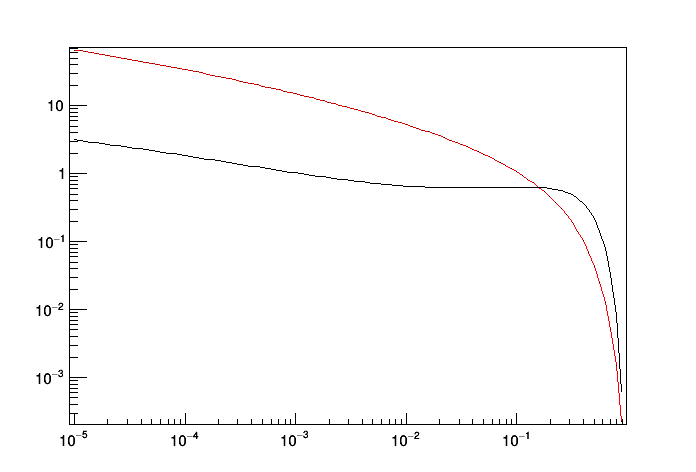

In [31]:
c = TCanvas()
c.SetLogx();
c.SetLogy();
grG.SetLineColor(kRed)
grG.Draw("alp")
grU.Draw("lp same")
c.Draw()